## Data Science Alura Formation - Exploratory Analysis of MovieLens

In the formation of Data Scienda www.alura.com.br one of the data sets we use is that of evaluations for films on the MovieLens website. In this project we will do an exploratory analysis of these data.

### Tips for the complete project:

- every graphic must have a title, labels and legends that make sense
- configure a suitable size for the graphics
- use the versions of the data files available on github

## Question: checking the versions used

- We must use pandas 0.24.0 or later
- We must use seaborn 0.9.0 or later
- We should use scipy 1.2.0 or later

In [10]:
# If you haven't some these libraries, uncomment them and run this cell.

# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet
# !pip install statsmodels
# !pip install matplotlib

# 1. Necessary imports

In [90]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.stats import shapiro 
from scipy.stats import  anderson
from scipy.stats import normaltest 
import warnings

warnings.simplefilter('ignore')

print("Using pandas %s" % pd.__version__)
print("Using seaborn %s" % sns.__version__)
print("Using scipy %s" % scipy.__version__)

Using pandas 1.2.2
Using seaborn 0.11.1
Using scipy 1.6.1


## Question: upload the movies

- the data `https: // raw.githubusercontent.com / alura-courses / training-data-science / master / movies.csv` must be loaded in` movies`
- rename the columns to `filmeId`,` titulo` and `generos`
- set the index to be the `movieId`

In [91]:
# solution
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
filmes.columns = ['filmeId','titulo','generos']
filmes.set_index('filmeId',inplace=True)

In [92]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [93]:
print("Loading %d movies" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! the dataset haven't just 9742 samples ")

Loading 9742 movies


We extractint movies' year:

In [94]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Question: loading as notes

- the data `https: // raw.githubusercontent.com / alura-Cursos / formacao-data-science / master / ratings.csv` must be loaded in` notes`
- rename the columns to `userId`,` filmId`, `note` and` moment`

In [95]:
# solution
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
notas.columns = ['usuarioId','filmeId','nota','momento']

In [96]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Question: generate a new feature, the average votes per movie

- create a new column called `nota_media` within the` movies` dataframe

Tips:
- as filmId is already the index of your dataframe films, if you have a series with the number of votes per film, just assign a new column normally that will be used the same index

In [97]:
# solution
filme_por_nota = notas.groupby('filmeId').nota
media_do_filme = filme_por_nota.mean()
filmes['nota_media'] = media_do_filme

<span style='color:blue'>
Organizes by the groupby the id of the films and capturing their score, after that, calculates the average of the groups.
</span>

In [98]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Question: remove movies with less than 50 ratings

- count the number of notes per film
- add a new column called `total_votes` to` movies` that represents the number of ratings that movie had on the data set
- remove those that have 49 or less of `movies`

## Solution

In [99]:
# solution for calculating total votes per movie
total_de_votos = notas['filmeId'].value_counts()
filmes['total_de_votos'] = total_de_votos

<span style = 'color: blue'>
It counts the amount of notes of the films, using value_counts () it organizes by the index (filmId) so we find the values.
</span>

In [100]:
# solution to create the new column and filter the films

index_filmes_menos_50 = filmes.query('total_de_votos < 50').index
index_filmes_menos_50
filmes.drop(index = index_filmes_menos_50,inplace=True)
filmes.dropna(inplace=True)

<span style='color:blue'>
Usando a função query() que retorna uma característica específica do dataframe, após isso organizamos os valores.
</span>

In [101]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Viewing general data

## Question: View the average grades

- histogram
- cummulative distribution function

Tips:

- remember to put a title on the images in addition to names on the x and y axes
- to generate the cumulative version remember to use the `hist_kws` and` kde_kws` parameters to set `'cumulative' = True`

<span style = 'color: blue'>
I made this cell because I was not understanding the values on the y-axis of the histograms of matplotlib and seaborn. Then, I realized that the values contained therein are the percentage of data that percentages such an interval included in the x-axis.
</span>

<AxesSubplot:xlabel='Frequência', ylabel='Medias'>

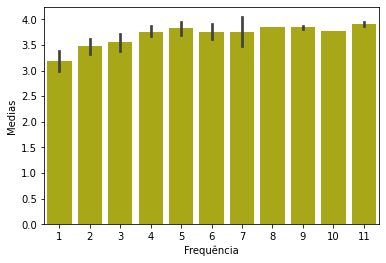

In [102]:
medias = filmes['nota_media'].round(2).value_counts().index.transpose()
freq_medias = filmes['nota_media'].round(2).value_counts().values.transpose()
colunas = {'Medias':medias,'Frequência':freq_medias}
medias_das_notas = pd.DataFrame(data=colunas)
medias_das_notas.set_index('Medias')    
sns.barplot(x="Frequência",y="Medias",data=medias_das_notas,color='y')

<span style = 'color: blue'>
Thus, the two cells below are the ones required by the instructor.
</span>

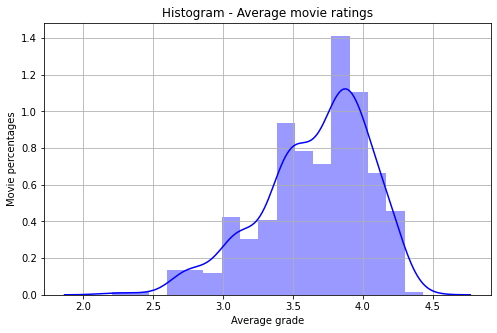

In [103]:
# solution histogram
plt.figure(figsize=(8,5))
ax = sns.distplot(filmes['nota_media'],color='blue')
ax.set(xlabel = 'Average grade', ylabel='Movie percentages',title="Histogram - Average movie ratings")
ax.grid()

<span style = 'color: blue'>
This histogram is close to a Gaussian with skewness values close to zero and mesoocurtic kurtosis.
</span>

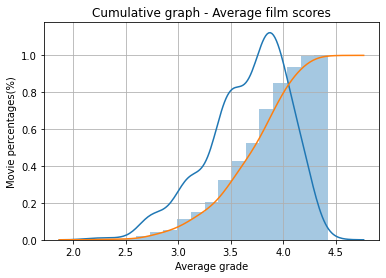

In [104]:
# solution cumulativa
kwargs = {'cumulative':True}
ax = sns.distplot(filmes['nota_media'],hist_kws=kwargs)
ax = sns.kdeplot(filmes['nota_media'],cumulative=True)
ax.set(xlabel = 'Average grade', ylabel='Movie percentages(%)',title="Cumulative graph - Average film scores")
ax.grid()

<span style = 'color: blue'>
I was unable to remove the blue line that comprises a Gaussian sustained (see in the tests below) of the displot function, this line refers to the histogram of the average grades of the films, as seen in the cell above.
</span>

## Question: View total votes
- histogram
- cumulative distribution function

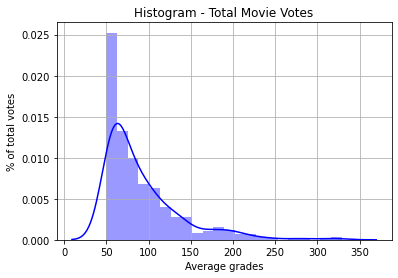

In [105]:
# cumulative solution
ax = sns.distplot(filmes['total_de_votos'],color='blue')
ax.set(xlabel = 'Average grades', ylabel='% of total votes',title="Histogram - Total Movie Votes")
ax.grid()

<span style = 'color: blue'>
This histogram is close to a Gaussian with skewness> 0 and leptocurtic kurtosis.
</span>

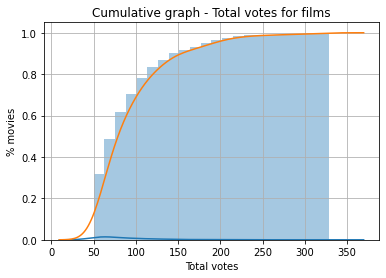

In [106]:
# cumulative solution
kwargs = {'cumulative':True}
ax = sns.distplot(filmes['total_de_votos'],hist_kws=kwargs)
ax = sns.kdeplot(filmes['total_de_votos'],cumulative=True)
ax.set(xlabel = 'Total votes', ylabel='% movies',title="Cumulative graph - Total votes for films")
ax.grid()

## Question: 20% of the dataframe's films are rated higher than?

- remember the pandas 'quantile' function

In [107]:
# solution
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.2)
nota_limite_dos_20_porcento

3.3742857142857146

<span style = 'color: blue'>
My doubt here is that this 20% are the worst films or the best films, what I did in the cell above was the worst films taking the whole data set.
</span>

In [108]:
print("20 percent of films score higher than %.2f" % nota_limite_dos_20_porcento)

20 percent of films score higher than 3.37


<span style = 'color: blue'>
Here below I show the average grade of the 20% of the best films.
</span>

In [109]:
nota_limite_dos_80_porcento = filmes['nota_media'].quantile(0.8)
nota_limite_dos_80_porcento
print("20 percent of the best films score higher than %.2f" % nota_limite_dos_80_porcento)

20 percent of the best films score higher than 3.99


## We will separate the column `generos` into several columns.

- The code is ready.

In [110]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("We have% of different genres" % generos.shape[1])

We have 23f different genres


In [111]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Question: viewing how many films there are by genre

- For each of the genres you must group the number of films
- Order the bars, on the left the genre with more films, on the right the one with less films

Tip:

- To sum up one or more columns individually you can use `your_dataframe.sum ()`
- No need to use the `movies` dataframe, only the` generos` dataframe
- In certain situations it is easier to use the plotting functions of pandas instead of seaborn

In [112]:
# solution
genero = ['Action','Adventure', 'Animation', 'Children',
           'Comedy', 'Crime', 'Documentary', 'Drama',
           'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
           'Musical', 'Mystery','Romance', 'SciFi',
           'Thriller', 'War', 'Western']
quantidade_de_filmes_por_genero = []
for i in genero:
    quantidade_de_filmes_por_genero.append(filmes[i].sum())
df_freq_filmes = pd.DataFrame({'Genero':genero,
                               'Frequencia':quantidade_de_filmes_por_genero})
df_popularidade = df_freq_filmes
df_freq_filmes = df_freq_filmes.sort_values('Frequencia',ascending=False)
df_freq_filmes.reset_index(drop=True, inplace=True)
df_freq_filmes.head()

,Genero,Frequencia
0,Comedy,181
1,Drama,166
2,Action,164
3,Adventure,132
4,Thriller,121


<span style = 'color: blue'>
It takes all the genres of films, from them it adds up the number of times that its columns have values 1's and inserts in the dataframe.
</span>

Text(0.5, 1.0, 'Movie frequencies by genre')

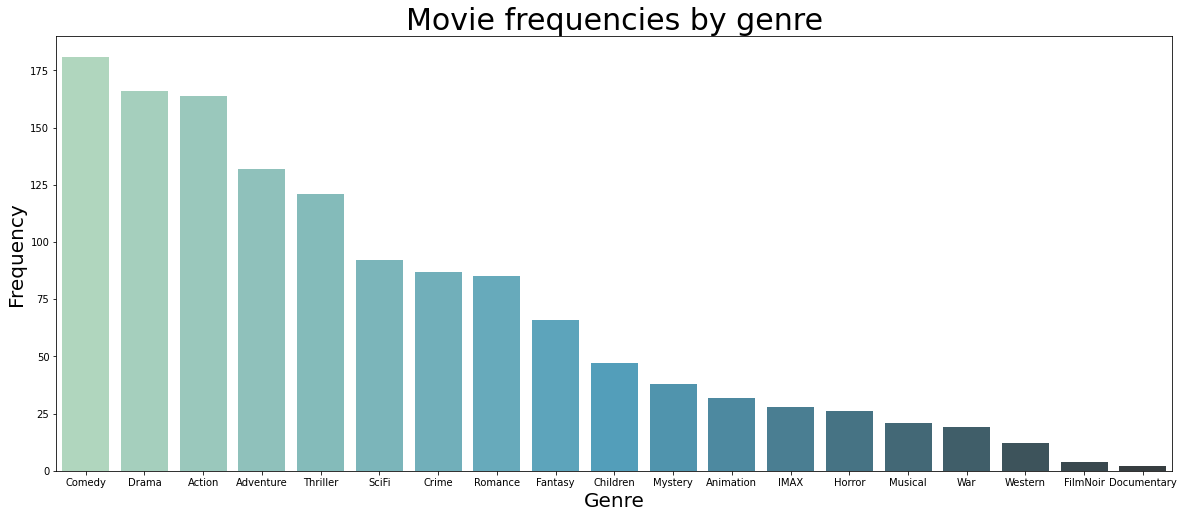

In [113]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Genero",y="Frequencia",data=df_freq_filmes,palette='GnBu_d')
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Frequency',fontsize=20)
ax.set_title('Movie frequencies by genre',fontsize=30)

<span style = 'color: blue'>
We see that drama and action films are very close, in addition to crime and romance films. Another thing to note, that if not all, but most films have more than two categories, therefore two or more categories may be present in films which may show that some types of films may have very close scores.
</span>

## Question: What are the 5 genres with the most films?

Tip:

- `sort_values ()` can order a series of pandas

In [114]:
# solution
top5_generos_em_quantidade_de_filmes = df_freq_filmes.head()

In [115]:
print(top5_generos_em_quantidade_de_filmes)

      Genero  Frequencia
0     Comedy         181
1      Drama         166
2     Action         164
3  Adventure         132
4   Thriller         121


## Question: viewing votes by gender

- the code that generates the votes by gender is already ready
- sort the categories from the most viewed to the least viewed
- manages the visualization by genre

In [116]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [117]:
# solucão
total_de_votos = []
for i in votos_por_genero_por_filme.columns:
    total_de_votos.append(votos_por_genero_por_filme[i].sum())
df_popularidade['total_de_votos'] = total_de_votos
total_de_votos

[15734.0,
 13117.0,
 3066.0,
 4331.0,
 15330.0,
 8649.0,
 108.0,
 15445.0,
 5993.0,
 291.0,
 2215.0,
 2492.0,
 1822.0,
 3452.0,
 7444.0,
 8989.0,
 11907.0,
 2113.0,
 900.0]

<span style = 'color: blue'>
Add the number of votes per category and arrange the vector in a descending order.
</span>

In [118]:
# solution
qt_de_votos_por_generos = pd.DataFrame({'Genero':votos_por_genero_por_filme.columns,
                                        'Total de votos':total_de_votos})
qt_de_votos_por_generos.reset_index(drop=True, inplace=True)
qt_de_votos_por_generos.sort_values('Total de votos',ascending=False,inplace=True)
qt_de_votos_por_generos.head()

,Genero,Total de votos
0,Action,15734.0
7,Drama,15445.0
4,Comedy,15330.0
1,Adventure,13117.0
16,Thriller,11907.0


<span style = 'color: blue'>
Place the results on a dataframe to facilitate viewing the ranking.
</span>

Text(0.5, 1.0, 'Number of votes by gender')

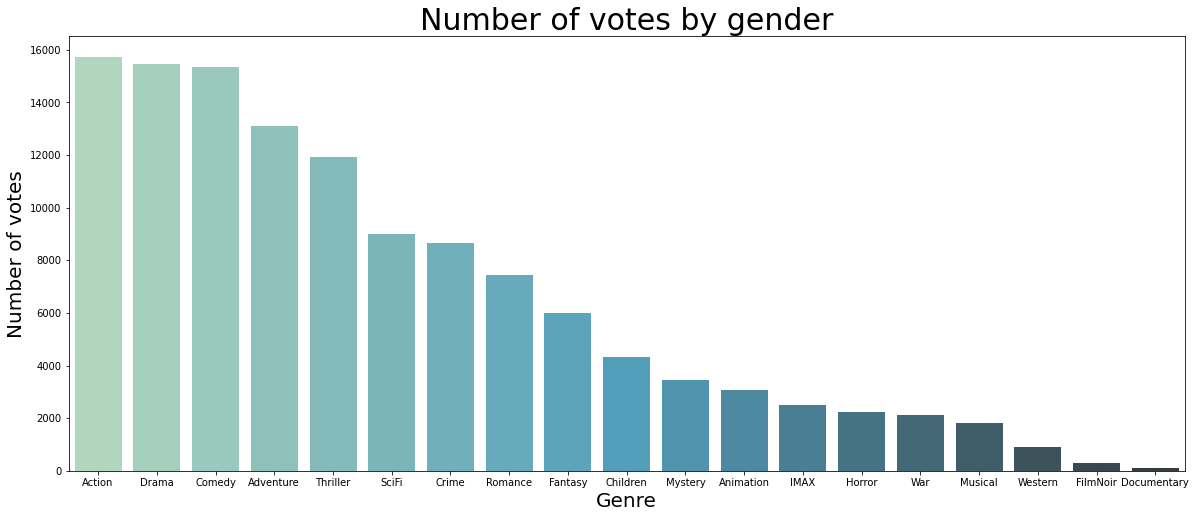

In [119]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Genero",y="Total de votos",data=qt_de_votos_por_generos,palette='GnBu_d')
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Number of votes',fontsize=20)
ax.set_title('Number of votes by gender',fontsize=30)

<span style = 'color: blue'>
We see that drama and comedy films are very close, in addition to crime and SciFi films. Another thing to note, that if not all, but most films have more than two categories, therefore two or more categories may be present in films which may show that some types of films may have very close scores. Therefore, if a user voted for one category, he / she is also voting for another (as) board.
</span>

## Question: votes per film by genre

We want to understand the number of votes in relation to the number of films that exist in that genre.

For example:
- if we have 1000 votes for `Action` and 10 films of that genre, there were 100 votes per film in this genre.
- if the `Documentary` genre has 2 films and 500 votes, it has 250 votes per film in that genre.

We want to understand this, the average "popularity" of a film in each category, that is, the number of votes divided by the number of films, organized for each category.

- You already have the number of votes by gender
- Calculate the number of votes per genre divided by the total number of films per genre
- Sort from highest to lowest
- Plot a graph to view this data

In [120]:
# code solution
df_popularidade['Voto/Filme'] = df_popularidade['total_de_votos']/df_popularidade['Frequencia']
df_popularidade.sort_values('Voto/Filme',ascending=False, inplace=True)

In [121]:
df_popularidade

,Genero,Frequencia,total_de_votos,Voto/Filme
17,War,19,2113.0,111.210526
5,Crime,87,8649.0,99.413793
1,Adventure,132,13117.0,99.371212
16,Thriller,121,11907.0,98.404959
15,SciFi,92,8989.0,97.706522
0,Action,164,15734.0,95.939024
2,Animation,32,3066.0,95.812500
7,Drama,166,15445.0,93.042169
3,Children,47,4331.0,92.148936
13,Mystery,38,3452.0,90.842105


Text(0.5, 1.0, 'Votes per film by genre')

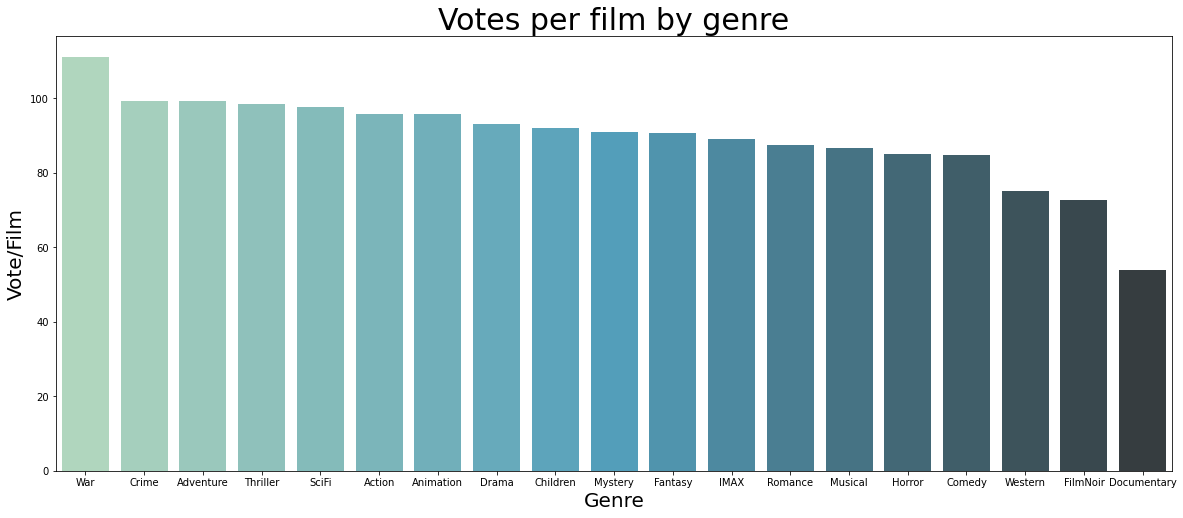

In [122]:
# solution with visualization
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Genero",y="Voto/Filme",data=df_popularidade,palette='GnBu_d')
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Vote/Film',fontsize=20)
ax.set_title('Votes per film by genre',fontsize=30)

<span style = 'color: blue'>
The War category has the highest Vote / Film value as it has only 19 films but 2113 votes, that is, few films and many votes. In addition, one can see a taste of users for films of this type in comparison to Western (old west) films than 12 films but only 900 votes.
    
However, one can also question about the arguments of films with more than one category that war films can correlate well with all other types of films.
</span>

## Question: Looking at the last 3 views what do you conclude about the `Action` and` War` genres?

In [123]:
df_popularidade

,Genero,Frequencia,total_de_votos,Voto/Filme
17,War,19,2113.0,111.210526
5,Crime,87,8649.0,99.413793
1,Adventure,132,13117.0,99.371212
16,Thriller,121,11907.0,98.404959
15,SciFi,92,8989.0,97.706522
0,Action,164,15734.0,95.939024
2,Animation,32,3066.0,95.812500
7,Drama,166,15445.0,93.042169
3,Children,47,4331.0,92.148936
13,Mystery,38,3452.0,90.842105


### Solution (free text):
    
<span style = 'color: red'>
     The note of the Action genre is more reliable, as there were more people targeting this style of film. Therefore, the opposite occurs in the War genre because it receives the highest value in Vote / Movies, but there are only 19 films and more than 2000 votes. In addition, we see that users like action movies more, as there are more films in this category.
</span>

## Question: Create 2 boxplots in the same plot comparing the `total_votes` column of the` Horror` and `Adventure` category films

Tip:

- it is sometimes easier to use the matplotlib boxplot instead of the seaborn
- plt.boxplot supports the labels parameter with a list of names for each boxplot plotted

Text(0, 0.5, 'Number of votes')

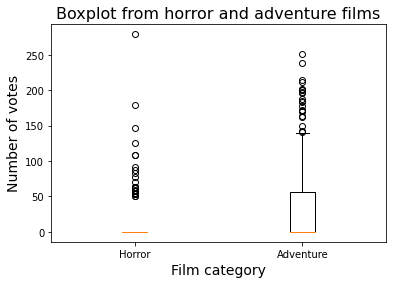

In [124]:
# solution:
plt.boxplot([votos_por_genero_por_filme['Horror'],votos_por_genero_por_filme['Adventure']])
plt.xticks([1, 2], ['Horror','Adventure'])
plt.title('Boxplot from horror and adventure films',fontsize=16)
plt.xlabel('Film category',fontsize=14)
plt.ylabel('Number of votes',fontsize=14)

<span style = 'color: blue'>
This boxplot does not show much, as there is a huge amount of null values that does with the central tedency measures (mean, median, fashion, quartiles, etc.) that depend on the amount of sample to give a result show wrong values. So, if we take those values out, we can see something more attractive for conclusions.
</span>

Text(0, 0.5, 'Number of votes')

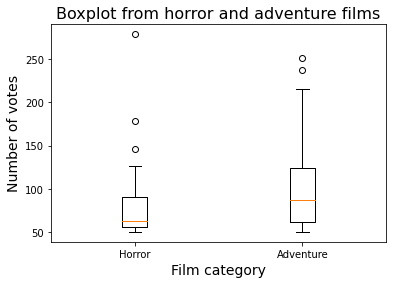

In [125]:
Horror = votos_por_genero_por_filme['Horror']
Aventura = votos_por_genero_por_filme['Adventure']
plt.boxplot([Horror[Horror>0],Aventura[Aventura>0]])
plt.xticks([1, 2], ['Horror','Adventure'])
plt.title('Boxplot from horror and adventure films',fontsize=16)
plt.xlabel('Film category',fontsize=14)
plt.ylabel('Number of votes',fontsize=14)

## Question: now show a boxplot for each of the categories

Tip:
- use generos.columns to access all genres
- we already removed the hyphens from the column names when we created the genre columns
- plt (pyplot) from matplotlib supports the xticks (rotation = 90) function to rotate labels

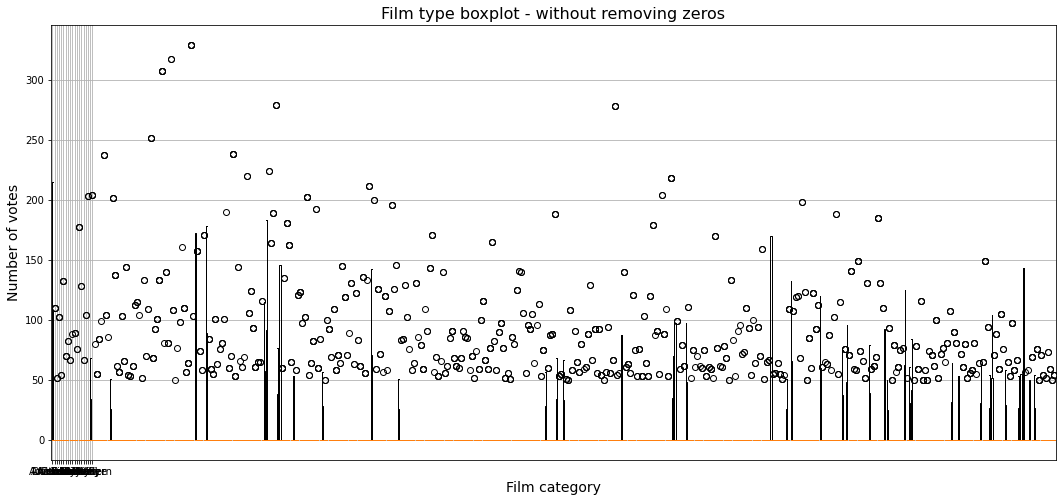

In [126]:
plt.figure(figsize=(18,8))
plt.boxplot(votos_por_genero_por_filme[generos.columns.values].transpose())
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], generos.columns.values)
plt.title('Film type boxplot - without removing zeros',fontsize=16)
plt.xlabel('Film category',fontsize=14)
plt.ylabel('Number of votes',fontsize=14)
plt.grid()

<span style = 'color: blue'>
This boxplot does not show much, as there is a huge amount of null values that does with the central tedency measures (mean, median, fashion, quartiles, etc.) that depend on the amount of sample to give a result show wrong values. So, if we take those values out, we can see something more attractive for conclusions.
</span>

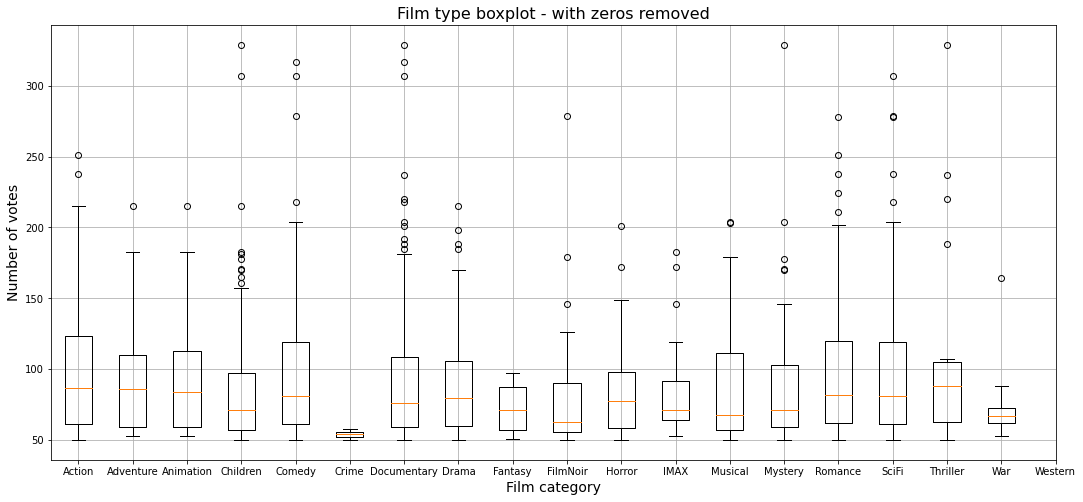

In [127]:
a = []
for i in generos.columns.values:
    a.append(votos_por_genero_por_filme[i].values)
b = []
for i in range(1,19):
    b.append(a[i][a[i]>0].transpose())

plt.figure(figsize=(18,8))
plt.boxplot(b)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], generos.columns.values)
plt.title('Film type boxplot - with zeros removed',fontsize=16)
plt.xlabel('Film category',fontsize=14)
plt.ylabel('Number of votes',fontsize=14)
plt.grid()

## Question: I want to create a film with only one of the genres: `Horror` or` Adventure`. I want to have a greater chance of having a bill that pays my bills, even if it is not an absurd super sales success. Which of the 2 genres do you suggest?

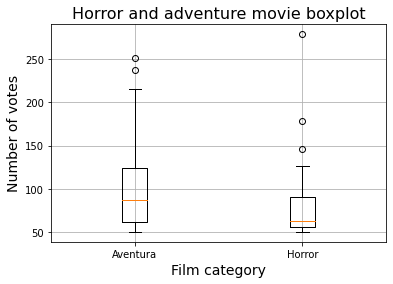

In [128]:
Aventura = votos_por_genero_por_filme['Adventure']
Horror = votos_por_genero_por_filme['Horror']

plt.boxplot([Aventura[Aventura>0],Horror[Horror>0]])
plt.xticks([1,2], ['Aventura','Horror'])
plt.title('Horror and adventure movie boxplot',fontsize=16)
plt.xlabel('Film category',fontsize=14)
plt.ylabel('Number of votes',fontsize=14)
plt.grid()

### Solution:

<span style = 'color: red'>
     Create an adventure movie! because there is a larger audience in it (based on the total votes), and you have a greater chance of getting a good grade as seen in the boxplot above. In addition, the median is closer to the average and most films are highly rated, that is, they are more likely to be seen.

</span>

## Question: our analysis was hitherto visual. Apply a statistical test to check if there is statistical significance in the distribution of votes for the films of `Adventure` and` Horror`. Does your recommendation remain the same? Explain.

Steps:

- visualize the distribution of both through histograms
- if you suspect normality in the distribution, do a normality test for both
- apply an appropriate test for comparing distributions
- explain the result found
- use p = 0.05

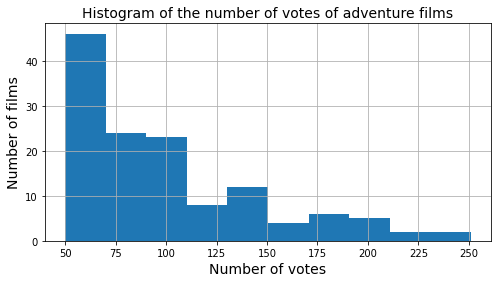

In [129]:
# adventure histogram solution

# Removing the zeros in the set we have:
plt.figure(figsize=(8,4))
ax = Aventura[Aventura>0].hist()
ax = plt.title('Histogram of the number of votes of adventure films',fontsize=14)
ax = plt.xlabel('Number of votes',fontsize=14)
ax = plt.ylabel('Number of films',fontsize=14)

<span style = 'color: blue'>
Here we can see that it may look like a Gaussian distribution with skewness> 0 and short leptocurtic, but to be sure we will do the statistical tests below.
</span>

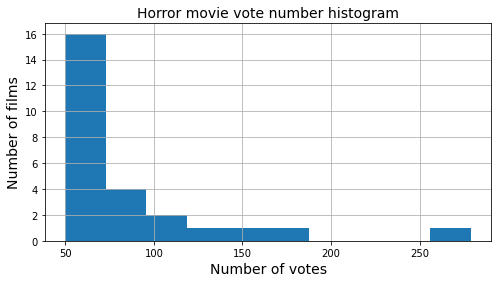

In [130]:
# horror histogram solution

# Removing the zeros in the set we have:
plt.figure(figsize=(8,4))
Horror[Horror>0].hist()
ax = plt.title('Horror movie vote number histogram',fontsize=14)
ax = plt.xlabel('Number of votes',fontsize=14)
ax = plt.ylabel('Number of films',fontsize=14)

<span style = 'color: blue'>
Here we can see that it doesn’t look like a Gaussian assignment, but to make sure we’ll do the statistical tests below.
</span>

In [131]:
# normality test solution or justification for not using it

# Shapiro-Wilk test evaluates whether the samples behave in a Gaussian, good for a small set of samples.
def teste_shapiro(dados):
    stat,p = shapiro(dados)
    alfa  =  0.05 
    if  p  >  alfa : 
        msg  =  'Shapiro test - The sample looks Gaussian (failure to reject H0)' 
    else : 
        msg  =  'Shapiro test - The sample does not look Gaussian (rejects H0)'
    print(msg)
    return stat,p

# Anderson test, which assesses which type of distribution the data behaves in, returns several values in addition to the p value.
def teste_anderson(dados):
    result = anderson(dados)
    stat = round(result.statistic, 4)
    p = 0
    result_mat = []
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            msg = 'Anderson test - The sample looks Gaussian (does not reject H0)'
        else:
            msg = 'Anderson test - The sample does not look Gaussian (rejects H0)'
        result_mat.append([len(dados), stat, sl, cv, msg])
    print(msg)

# Teste D'Agostino or K² test, returns a statistical removal of the data.
def test_dagostino(dados):
    stat, p = normaltest(dados)
    alpha = 0.05
    if p > alpha:
        msg = "D'Agostino test - The sample looks Gaussian (does not reject H0)"
    else:
        msg = "D'Agostino test - The sample does not look Gaussian (rejects H0)"
    print(msg)

In [132]:
# solution with the desired test
teste_shapiro(Aventura[Aventura>0])
teste_anderson(Aventura[Aventura>0])
test_dagostino(Aventura[Aventura>0])
print("*" * 80)
teste_shapiro(Horror[Horror>0])
teste_anderson(Horror[Horror>0])
test_dagostino(Horror[Horror>0])

Shapiro test - The sample does not look Gaussian (rejects H0)
Anderson test - The sample does not look Gaussian (rejects H0)
D'Agostino test - The sample does not look Gaussian (rejects H0)
********************************************************************************
Shapiro test - The sample does not look Gaussian (rejects H0)
Anderson test - The sample does not look Gaussian (rejects H0)
D'Agostino test - The sample does not look Gaussian (rejects H0)


### Solution (explain your conclusion):
<span style = 'color: red'>

It was not necessary to carry out the tests to know that the two distributions are not Gaussian, but I used mathematics as an ally. Therefore, these data were taken from a data collection with bias, which we can mention the users' preference for a certain category of films or the number of films available in a certain type.
Therefore, my suggestion remains the same and I can also add that adventure films are more likely to be a platform users' preferences.
    
</span>

## Question: Make the same boxplots for the middle notes (`nota_media`) of the genres` Adventure` and `Horror`.

In [133]:
# solution:
nota_media_horror = filmes.query('Horror==1').nota_media
nota_media_aventura = filmes.query('Adventure==1').nota_media


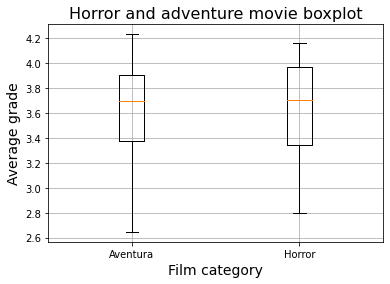

In [134]:
plt.boxplot([nota_media_aventura,nota_media_horror])
plt.xticks([1,2], ['Aventura','Horror'])
plt.title('Horror and adventure movie boxplot',fontsize=16)
plt.xlabel('Film category',fontsize=14)
plt.ylabel('Average grade',fontsize=14)
plt.grid()

## Question: I want to make a film that is critically successful, with people giving high marks, even if there is not a very large number of people watching. Which genre do you recommend if I have to choose only one between `Adventure` and` Horror`?

### Solution:
<span style = 'color: red'>
Horror, as there is a greater chance than receiving higher grades with films of this type. See the boxplot above, the distribution of the horror category is more dense in the intervals [3.4, 4.0] and the adventure films in [3.4, 3.8].
</span>

## Question: our analysis was hitherto visual. Apply a statistical test to check if there is statistical significance in the distribution of the grades of the films of `Adventure` and` Horror`.

Steps:

- visualize the distribution of both through histograms
- if you suspect normality in the distribution, do a normality test for both
- apply an appropriate test for comparing distributions
- explain the result found
- use p = 0.05

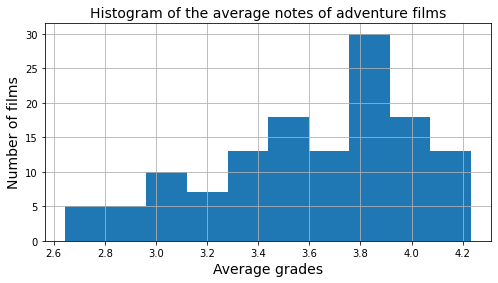

In [135]:
# adventure histogram solution
plt.figure(figsize=(8,4))
nota_media_aventura.hist()
ax = plt.title('Histogram of the average notes of adventure films',fontsize=14)
ax = plt.xlabel('Average grades',fontsize=14)
ax = plt.ylabel('Number of films',fontsize=14)

<span style = 'color: blue'>
Here we can see that it may look like a Gaussian distribution with negative skewness and mesocurtic kurtosis, but to be sure we will do the statistical tests below.
</span>

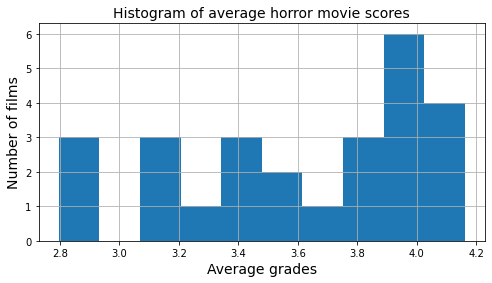

In [136]:
# solution horror histogram
plt.figure(figsize=(8,4))
nota_media_horror.hist()
ax = plt.title('Histogram of average horror movie scores',fontsize=14)
ax = plt.xlabel('Average grades',fontsize=14)
ax = plt.ylabel('Number of films',fontsize=14)

<span style = 'color: blue'>
Here we can see that it may look like a Gaussian distribution with skewness> 0 and short leptocurtic, but to be sure we will do the statistical tests below.
</span>

In [137]:
# normality test solution or justification for not using it
teste_shapiro(nota_media_horror)
teste_anderson(nota_media_horror)
test_dagostino(nota_media_horror)
print("*" * 80)
teste_shapiro(nota_media_aventura)
teste_anderson(nota_media_aventura)
test_dagostino(nota_media_aventura)

Shapiro test - The sample does not look Gaussian (rejects H0)
Anderson test - The sample looks Gaussian (does not reject H0)
D'Agostino test - The sample looks Gaussian (does not reject H0)
********************************************************************************
Shapiro test - The sample does not look Gaussian (rejects H0)
Anderson test - The sample does not look Gaussian (rejects H0)
D'Agostino test - The sample does not look Gaussian (rejects H0)


### Solution with the desired test => Explanation of the results
<span style = 'color: red'>
     It was not necessary to carry out the tests to know that the two distributions are not Gaussian, but I used mathematics as an ally. Therefore, these data were taken from a data collection with bias, which we can mention the users' preference for a certain category of films or the number of films available in a certain type.
</span>

## Does your recommendation for more critical success on a high note between `Horror` and` Adventure` remain the same? Explain.

### Solution:
<span style = 'color: red'>
     No, because seeing that the category of Adventure films showed that its samples behave like a Gaussian in two of the three tests. In addition, according to the histogram of the adventure film, we see that most films are in the range [3.4, 4.0].
</span>

## Question: I want to make a film that is first critical success, with people giving high marks. Secondly, I want it to be popular (more people watch). With the visual and statistical information, assuming you can choose only one, which two genres do you recommend now? Horror or Adventure?

### Solution:
<span style = 'color: red'>
     From the previous tests, we see that the most advisable is to make adventure films (Adventure).
</span>

## Question: What are the top 5 films from the 2 most watched genres?

- use the 2 most voted genres in `notas_por_genero`
- use `nota_media` to define the top 5 films
- the result is 5, not 10 films

In [138]:
aux = df_popularidade.sort_values('total_de_votos',ascending=False)
votos_por_genero = aux.iloc[[0,1]]

In [139]:
# solution: calculating the 2 most voted genres
votos_por_genero

,Genero,Frequencia,total_de_votos,Voto/Filme
0,Action,164,15734.0,95.939024
7,Drama,166,15445.0,93.042169


In [140]:
# solution: finding the top 5 films of these genres
top5_action = filmes.query('Action == 1').sort_values('nota_media',ascending=False)
top5_action.iloc[[0,1,2,3,4]]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1197,"Princess Bride, The (1987)",1987.0,4.232394,142.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1208,Apocalypse Now (1979),1979.0,4.219626,107.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [141]:
top5_drama = filmes.query('Drama == 1').sort_values('nota_media',ascending=False)
top5_drama.iloc[[0,1,2,3,4]]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Question: What are the 2 genres with the highest correlation value with the `nota_media`? And the 2 with the lowest correlation value with the `nota_media`?

- pandas has the `corr` function to calculate correlation between all columns

In [142]:
aux = filmes.corr().sort_values('nota_media',ascending=False)['nota_media']
aux

nota_media           1.000000
total_de_votos       0.342584
Drama                0.277662
Crime                0.190220
Mystery              0.129914
War                  0.125615
FilmNoir             0.081766
IMAX                 0.064931
Animation            0.043071
Documentary         -0.003486
Musical             -0.008529
Thriller            -0.016782
Fantasy             -0.020986
Children            -0.030360
Horror              -0.033877
Western             -0.059642
Romance             -0.072002
Adventure           -0.079985
SciFi               -0.136717
Action              -0.154089
ano_de_lancamento   -0.159146
Comedy              -0.256005
Name: nota_media, dtype: float64

In [143]:
# solucao
print(f"The two categories with the highest correlation are Drama ({aux[2].round(2)}) and Crime ({aux[3].round(2)})")
print("*"*80)
print(f"The two categories with the lowest correlation are Documentary ({aux[9].round(3)}) and Musical ({aux[10].round(2)})")

The two categories with the highest correlation are Drama (0.28) and Crime (0.19)
********************************************************************************
The two categories with the lowest correlation are Documentary (-0.003) and Musical (-0.01)


## Question: What are the 2 genders with the highest correlation value with `total_votes`? And which 2 have the lowest correlation value with `total_votes`?

In [144]:
aux = filmes.corr().sort_values('total_de_votos',ascending=False)['total_de_votos']
aux

total_de_votos       1.000000
nota_media           0.342584
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

In [145]:
# solucao
print("The two categories with the highest correlation are Adventure ({}) and War ({})".format(aux[2].round(2),aux[3].round(2)))
print("*"*80)
print("The two categories with the lowest correlation are Children ({}) and Mystery ({})".format(aux[10].round(3),aux[11].round(3)))

The two categories with the highest correlation are Adventure (0.1) and War (0.09)
********************************************************************************
The two categories with the lowest correlation are Children (0.002) and Mystery (-0.007)


## Question: Graphically view the relationship between year of release and average grade - Use the `lineplot` graph

Text(0.5, 1.0, 'Graph showing the correlation between average grade and launch grade')

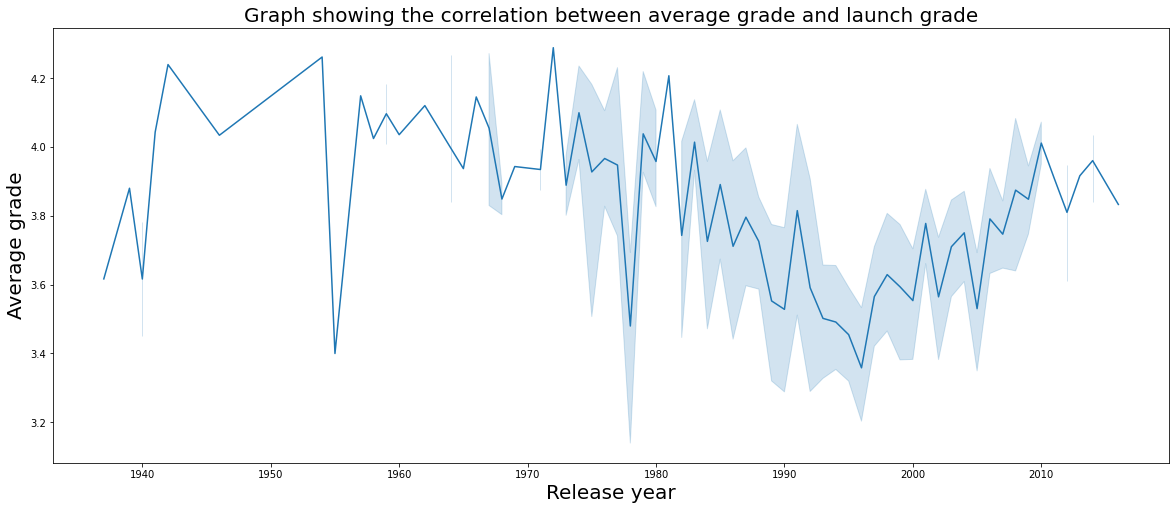

In [146]:
# solução
total_de_votos_e_ano_lan_values = filmes[['nota_media','ano_de_lancamento']]
plt.figure(figsize=(20,8))
ax = sns.lineplot(x='ano_de_lancamento',y='nota_media',data=total_de_votos_e_ano_lan_values)
ax.set_xlabel('Release year',fontsize=20)
ax.set_ylabel('Average grade',fontsize=20)
ax.set_title('Graph showing the correlation between average grade and launch grade',fontsize=20)

## Question: Interpret the correlation between `lancamento_year` and` nota_media`?

- Calculate the correlation numerically (use the pandas' corr`)
- Correlation does not imply causality, which "problem" in data collection can generate this type of correlation?

In [147]:
# solution (code)
corr_total_de_votos_e_ano_lan_values = filmes[['nota_media','ano_de_lancamento']].corr()
corr_total_de_votos_e_ano_lan_values

,nota_media,ano_de_lancamento
nota_media,1.000000,-0.159146
ano_de_lancamento,-0.159146,1.000000


Text(0.5, 1.0, 'Graph showing the correlation between average grade and launch grade')

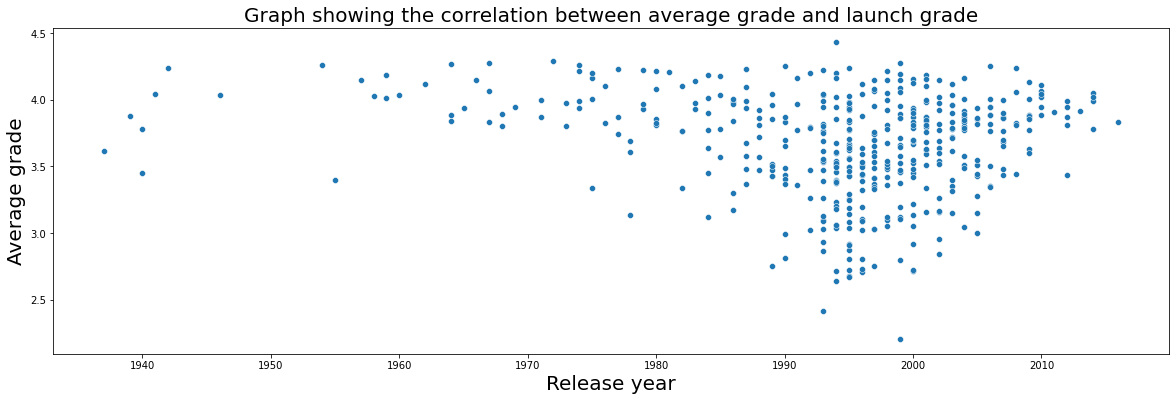

In [148]:
plt.figure(figsize=(20,6))
ax = sns.scatterplot(x='ano_de_lancamento',y='nota_media',data=total_de_votos_e_ano_lan_values)
ax.set_xlabel('Release year',fontsize=20)
ax.set_ylabel('Average grade',fontsize=20)
ax.set_title('Graph showing the correlation between average grade and launch grade',fontsize=20)

### Solution (explanation)
<span style = 'color: red'>
     What we can see is that there are more films between the 1990s and 2010 and this causes the low correlation value (close to zero).
</span>

Text(0.5, 1.0, 'Correlation of average score with year of release after the 90')

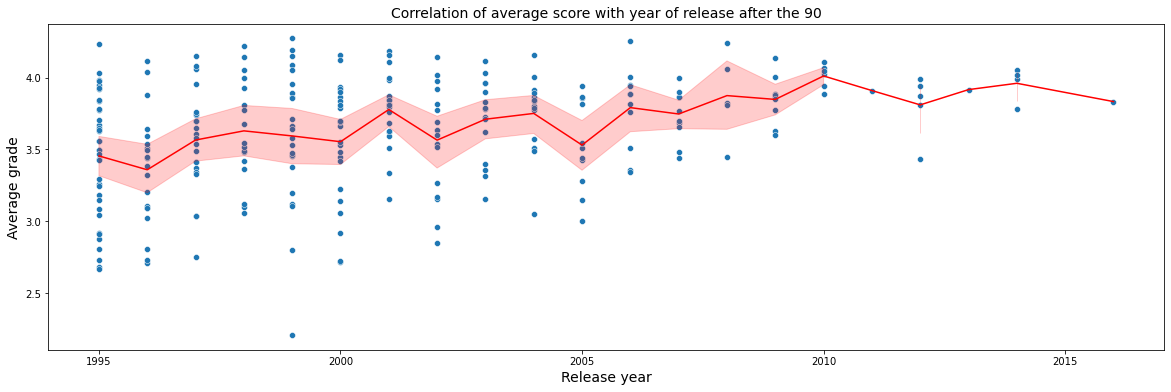

In [149]:
ano_lan = []
media = []
for i in range(len(filmes[['nota_media','ano_de_lancamento']])):
    if filmes[['nota_media','ano_de_lancamento']].iloc[i].values[1] > 1994:
        ano_lan.append(filmes['ano_de_lancamento'].iloc[i])
        media.append(filmes['nota_media'].iloc[i])
decada_de_90_pra_frente = pd.DataFrame({'Ano_lan':ano_lan,'Media':media})

plt.figure(figsize=(20,6))
ax = sns.scatterplot(x="Ano_lan",y="Media",data=decada_de_90_pra_frente)
ax = sns.lineplot(x="Ano_lan",y="Media",data=decada_de_90_pra_frente,color='red')
ax.set_xlabel('Release year',fontsize=14)
ax.set_ylabel('Average grade',fontsize=14)
ax.set_title('Correlation of average score with year of release after the 90',fontsize=14)

In [150]:
decada_de_90_pra_frente.corr()

,Ano_lan,Media
Ano_lan,1.000000,0.348603
Media,0.348603,1.000000


Text(0.5, 1.0, 'Correlation of average score with year of release before the 90s')

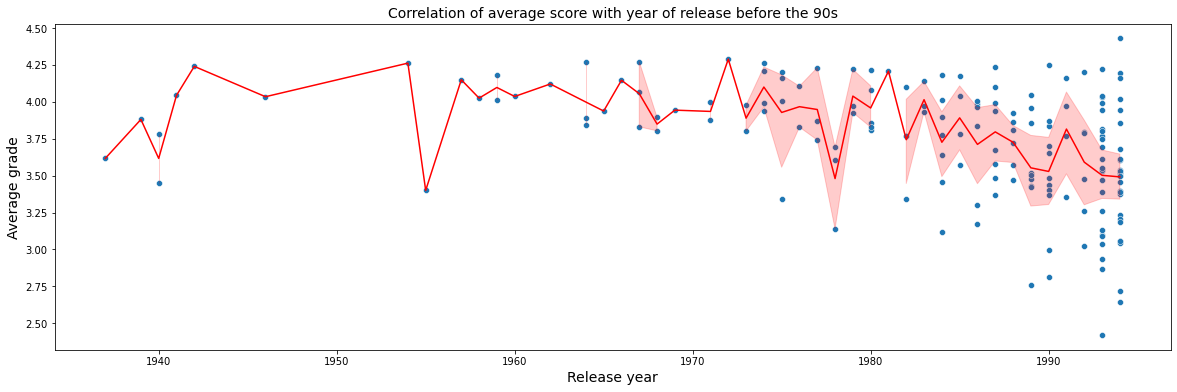

In [151]:
ano_lan = []
media = []
for i in range(len(filmes[['nota_media','ano_de_lancamento']])):
    if ~(filmes[['nota_media','ano_de_lancamento']].iloc[i].values[1] > 1994):    
        ano_lan.append(filmes['ano_de_lancamento'].iloc[i])
        media.append(filmes['nota_media'].iloc[i])
        
decada_de_90_pra_tras = pd.DataFrame({'Ano_lan':ano_lan,'Media':media})
plt.figure(figsize=(20,6))
ax = sns.scatterplot(x="Ano_lan",y="Media",data=decada_de_90_pra_tras)
ax = sns.lineplot(x="Ano_lan",y="Media",data=decada_de_90_pra_tras,color='red')
ax.set_xlabel('Release year',fontsize=14)
ax.set_ylabel('Average grade',fontsize=14)
ax.set_title('Correlation of average score with year of release before the 90s',fontsize=14)

In [152]:
decada_de_90_pra_tras.corr()

,Ano_lan,Media
Ano_lan,1.000000,-0.386594
Media,-0.386594,1.000000


<span style = 'color: blue'>
Note that there is already a positive value and double the modulus of the value of the previous correlation.
</span>

## Question: analyze a pairplot

- create a variable called `infos` based on the columns` ano_de_lancamento`, `nota_media` and` total_de_votos` of `films`
- pairplot using seaborn
- place a linear regression for each small plot inside it

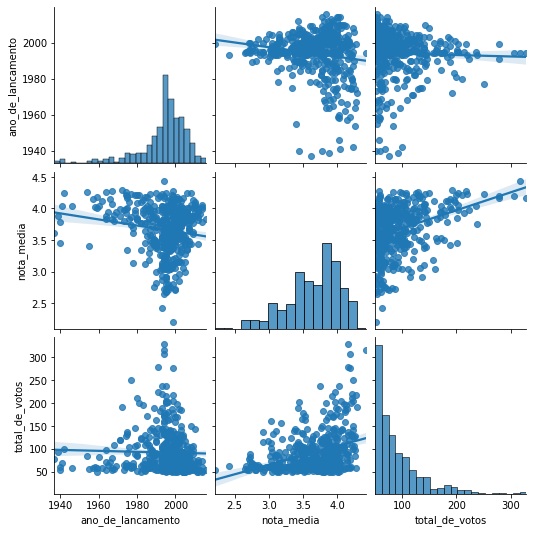

In [153]:
# solution
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
ax = sns.pairplot(infos,kind='reg')

## Question: analyze a pairplot from the `Animation` films

- use the `movies` dataframe
- in a single pairplot, separate the films of the category `Animation` from the others with different colors
- use a pallet like `husl`
- use separate markers for each of the two groups
- pairplot using seaborn and place a linear regression for each small plot inside it
- in both x and y use only three variables: `total_votes`,` year_of_lancamento`, `nota_media`

In [154]:
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos','Animation']]
infos

,ano_de_lancamento,nota_media,total_de_votos,Animation
filmeId,,,,
1,1995.0,3.920930,215.0,1
2,1995.0,3.431818,110.0,0
3,1995.0,3.259615,52.0,0
6,1995.0,3.946078,102.0,0
7,1995.0,3.185185,54.0,0
...,...,...,...,...
109374,2014.0,3.778846,52.0,0
109487,2014.0,3.993151,73.0,0
112852,2014.0,4.050847,59.0,0


<Figure size 1440x576 with 0 Axes>

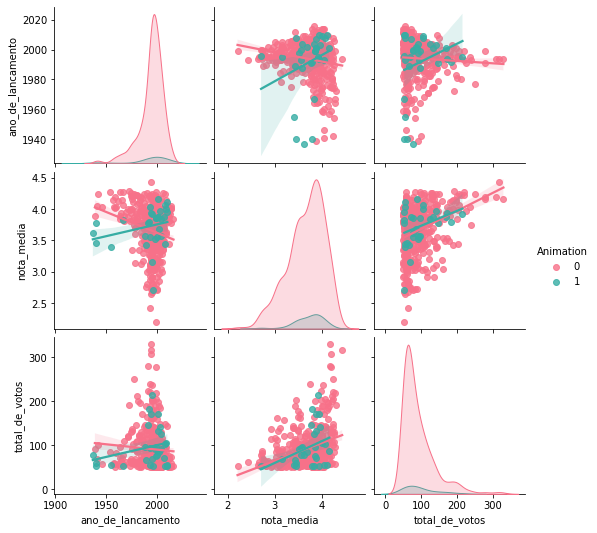

In [155]:
plt.figure(figsize=(20,8))
ax = sns.pairplot(infos,kind='reg',hue='Animation',palette='husl'
                  ,vars=['ano_de_lancamento','nota_media','total_de_votos']
                 ,hue_order=[0,1])

## Question: Analyze the regression in relation to the release year.

- How does the `nota_media` of older and more recent Animation films seem to behave? (year_of_lancamento x nota_media). This correlation appears to be low, but does it appear to be linear?
- What about the `year_of_lancamento` x` total_of_votes`?
- And the other categories? Compare that to the other films.
- What leads you to raise as a hypothesis for this result?

### Solution:



#### How does the `nota_media` of older and more recent Animation films seem to behave? (`ano_de_lancamento x nota_media`). This correlation appears to be low, but does it appear to be linear?

Text(0.5, 1.0, 'Year of launch x average grade, before the 1990s.-0.305 correlation')

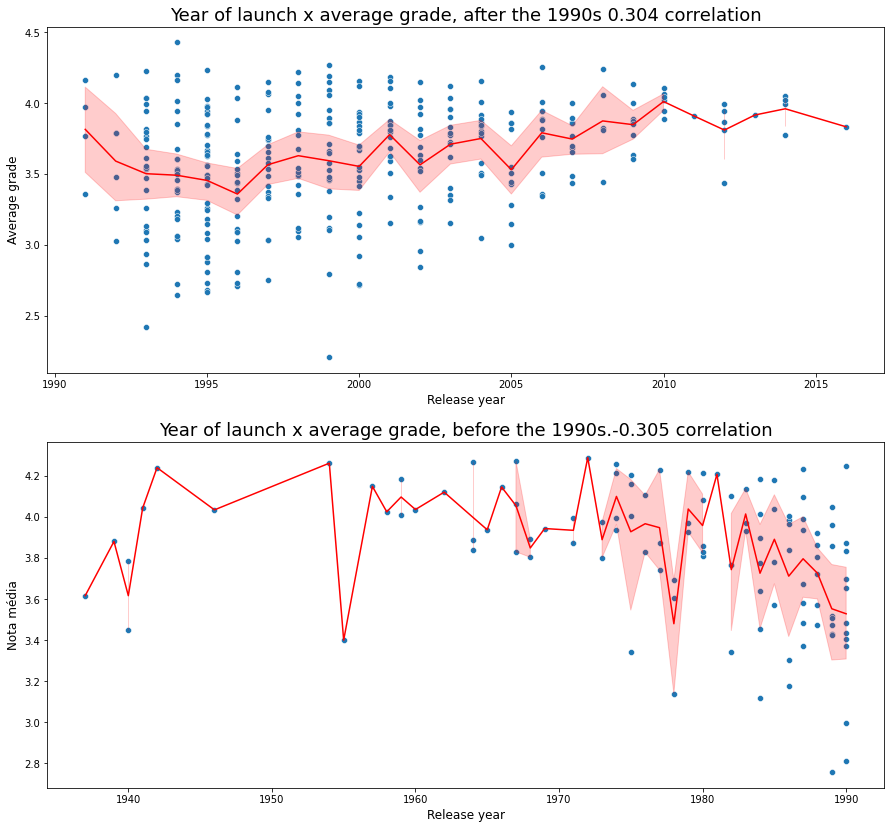

In [164]:
ano_lan_sim = []
total_votos_sim = []
ano_lan_nao = []
total_votos_nao = []

for i in range(len(filmes[['nota_media','ano_de_lancamento']])):
    if filmes[['nota_media','ano_de_lancamento']].iloc[i].values[1] > 1990:
        ano_lan_sim.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_sim.append(filmes['nota_media'].iloc[i])
    else:
        ano_lan_nao.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_nao.append(filmes['nota_media'].iloc[i])
        
decada_de_90_pra_frente = pd.DataFrame({'Ano_lancamento':ano_lan_sim,'nota_media':total_votos_sim})
decada_de_90_pra_tras = pd.DataFrame({'Ano_lancamento':ano_lan_nao,'nota_media':total_votos_nao})


plt.figure(figsize=(15,14))
plt.subplot(211)
ax1 = sns.scatterplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_frente)
ax1 = sns.lineplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_frente,color='red')
corr_depois_decada_1990 = decada_de_90_pra_frente.corr()['nota_media'].values[0].round(3)
ax1.set_xlabel('Release year', fontsize=12)
ax1.set_ylabel('Average grade', fontsize=12)
ax1.set_title('Year of launch x average grade, after the 1990s% .3f correlation' % 
              corr_depois_decada_1990,fontsize=18)

plt.subplot(212)
ax2 = sns.scatterplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_tras)
ax2 = sns.lineplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_tras,color='red')
corr_antes_decada_1990 = decada_de_90_pra_tras.corr()['nota_media'].values[0].round(3)
ax2.set_xlabel('Release year', fontsize=12)
ax2.set_ylabel('Nota média', fontsize=12)
ax2.set_title('Year of launch x average grade, before the 1990s.% .3f correlation' % 
              corr_antes_decada_1990,fontsize=18)


<span style = 'color:blue'>
When all values are plotted, we see that the last few years have a small number of films, so we can see a ** negative correlation ** between ** ano_de_lancamento x nota_media ** if we take the data from the ** 1990s * * we see that the average grades have ** positive correlation ** with the year of release of the film.
</span>

#### ano_de_lancamento vs total_de_votos?

Text(0.5, 1.0, 'Launching year x total votes, before the 1990s 0.218 correlation')

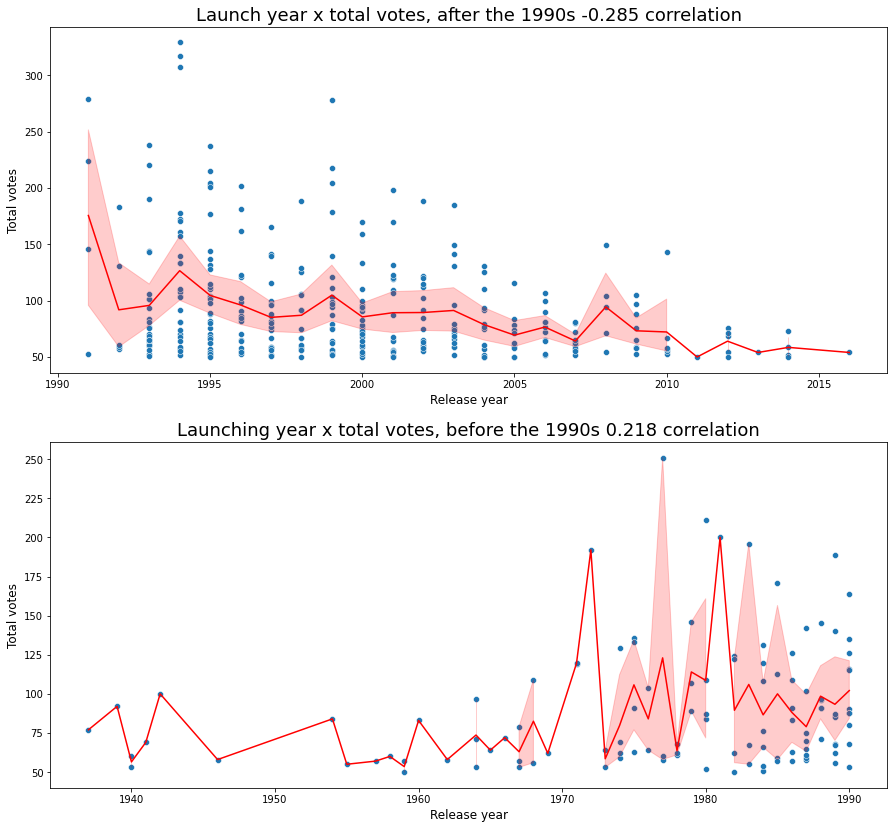

In [157]:
ano_lan_sim = []
total_votos_sim = []
ano_lan_nao = []
total_votos_nao = []

for i in range(len(filmes[['total_de_votos','ano_de_lancamento']])):
    if filmes[['total_de_votos','ano_de_lancamento']].iloc[i].values[1] > 1990:
        ano_lan_sim.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_sim.append(filmes['total_de_votos'].iloc[i])
    else:
        ano_lan_nao.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_nao.append(filmes['total_de_votos'].iloc[i])
        
decada_de_90_pra_frente = pd.DataFrame({'Ano_lancamento':ano_lan_sim,'total_de_votos':total_votos_sim})
decada_de_90_pra_tras = pd.DataFrame({'Ano_lancamento':ano_lan_nao,'total_de_votos':total_votos_nao})


plt.figure(figsize=(15,14))
plt.subplot(211)
ax1 = sns.scatterplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_frente)
ax1 = sns.lineplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_frente,color='red')
corr_depois_decada_1990 = decada_de_90_pra_frente.corr()['total_de_votos'].values[0].round(3)
ax1.set_xlabel('Release year', fontsize=12)
ax1.set_ylabel('Total votes', fontsize=12)
ax1.set_title('Launch year x total votes, after the 1990s %.3f correlation' % 
              corr_depois_decada_1990,fontsize=18)

plt.subplot(212)
ax2 = sns.scatterplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_tras)
ax2 = sns.lineplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_tras,color='red')
corr_antes_decada_1990 = decada_de_90_pra_tras.corr()['total_de_votos'].values[0].round(3)
ax2.set_xlabel('Release year', fontsize=12)
ax2.set_ylabel('Total votes', fontsize=12)
ax2.set_title('Launching year x total votes, before the 1990s% .3f correlation' % 
              corr_antes_decada_1990,fontsize=18)


<span style='color: blue'>
When all values are plotted, we see that the last few years have a small number of films, so we can see a ** positive correlation ** between ** year_of_lance and x total_of_votes ** already if we take the data from the ** 1990s * * we see that the average grades have ** negative correlation ** with the year of release of the film.
</span>


<span style="color: red"> **I believe that these graphics already answer the other questions, because I am analyzing all the films, so if they put only a few categories I could reach wrong conclusions due to some having little data** </span>.

## Question: Explore

- share with us 2 extra views that you find interesting
- explain what you found
- use as many cells (text or code) as you think necessary

### Solution
<span style='color:red'>
First, they are the graphics of the previous question, something happened that from the 1990s (by the graphic, in 1994 specifically) the number of films increased.
</span>

# <span style="color:blue" >Análise das 5 melhores categorias</span>

In [158]:
df_popularidade.sort_values('Frequencia',ascending=False).head()

,Genero,Frequencia,total_de_votos,Voto/Filme
4,Comedy,181,15330.0,84.696133
7,Drama,166,15445.0,93.042169
0,Action,164,15734.0,95.939024
1,Adventure,132,13117.0,99.371212
16,Thriller,121,11907.0,98.404959


<span style='color:blue'>
Comedy films are the worst rated among the top 5 categories.
</span>

In [159]:
def decada_de_90(dados): 
    ano_lan_sim = []
    total_votos_sim = []
    ano_lan_nao = []
    total_votos_nao = []

    for i in range(len(dados[['total_de_votos','ano_de_lancamento']])):
        if dados[['total_de_votos','ano_de_lancamento']].iloc[i].values[1] > 1990:
            ano_lan_sim.append(dados['ano_de_lancamento'].iloc[i])
            total_votos_sim.append(dados['total_de_votos'].iloc[i])
        else:
            ano_lan_nao.append(dados['ano_de_lancamento'].iloc[i])
            total_votos_nao.append(dados['total_de_votos'].iloc[i])

    decada_de_90_pra_frente = pd.DataFrame({'Ano_lancamento':ano_lan_sim,'total_de_votos':total_votos_sim})
    decada_de_90_pra_tras = pd.DataFrame({'Ano_lancamento':ano_lan_nao,'total_de_votos':total_votos_nao})
    return decada_de_90_pra_frente,decada_de_90_pra_tras

In [160]:
filmes_de_comedia  = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Comedy']].query('Comedy==1')
filmes_de_drama    = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Drama']].query('Drama==1')
filmes_de_acao     = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Action']].query('Action==1')
filmes_de_aventura = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Adventure']].query('Adventure==1')
filmes_de_terror   = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Thriller']].query('Thriller==1')

In [161]:
comedia_depois_90,comedia_antes_90 = decada_de_90(filmes_de_comedia)
drama_depois_90,drama_antes_90 = decada_de_90(filmes_de_drama)
acao_depois_90,acao_antes_90 = decada_de_90(filmes_de_acao)
aventura_depois_90,aventura_antes_90 = decada_de_90(filmes_de_aventura)
terror_depois_90,terror_antes_90 = decada_de_90(filmes_de_terror)

In [162]:
rank_de_votos_depois_90 = pd.DataFrame({'Categoria':['Comédia','Drama','Ação','Aventura','Terror'],
                                       'Total_de_votos':[comedia_depois_90['total_de_votos'].sum(),
                                                         drama_depois_90['total_de_votos'].sum(),
                                                         acao_depois_90['total_de_votos'].sum(),
                                                         aventura_depois_90['total_de_votos'].sum(),
                                                         terror_depois_90['total_de_votos'].sum()] })
rank_de_votos_depois_90.sort_values('Total_de_votos',ascending=False)

,Categoria,Total_de_votos
1,Drama,12098.0
2,Ação,12056.0
0,Comédia,11561.0
4,Terror,10165.0
3,Aventura,9749.0


The category **Drame** is the most voted from the 1990's, but also the movies **action** are em second place in this rank.


In [163]:
rank_de_votos_antes_90 = pd.DataFrame({'Categoria':['Comédia','Drama','Ação','Aventura','Terror'],
                                       'Total_de_votos':[comedia_antes_90['total_de_votos'].sum(),
                                                         drama_antes_90['total_de_votos'].sum(),
                                                         acao_antes_90['total_de_votos'].sum(),
                                                         aventura_antes_90['total_de_votos'].sum(),
                                                         terror_antes_90['total_de_votos'].sum()] })
rank_de_votos_antes_90.sort_values('Total_de_votos',ascending=False)

,Categoria,Total_de_votos
0,Comédia,3769.0
2,Ação,3678.0
3,Aventura,3368.0
1,Drama,3347.0
4,Terror,1742.0


Even before the 1990s, the **comedy** category was in the lead, in addition, **action** films were also in second place with a small difference.
